In [1]:
import os 
import re
import cv2 
import json
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from pickle import load,dump
from sklearn.feature_extraction.text import CountVectorizer

from utils_torch import  Image_Caption,get_tier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cuda')

In [3]:
# Load model
model_path = '/home/kriselda/source/repos/a-PyTorch-Tutorial-to-Image-Captioning/checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar'
checkpoint = torch.load(model_path, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

# Load word map (word2ix)
word_map_path = '/home/kriselda/source/Datasets/coco/images/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json'
with open(word_map_path, 'r') as j:
    word_map = json.load(j)
rev_word_map = {v: k for k, v in word_map.items()}  # ix2word

# Encode, decode with attention and beam search
model = None


In [4]:
%%time
#word embedding
glove_dir='glove/glove.6B.300d.txt'
embeddings_index = {}
embeddings_index_all = {}
f = open(glove_dir,encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index_all[word] = coefs


f.close()    


CPU times: user 12.6 s, sys: 626 ms, total: 13.3 s
Wall time: 13.3 s


In [5]:
im_cp = Image_Caption(images_dir='',
                      model = model,
                      encoder =encoder,
                      decoder = decoder,
                      w2v = embeddings_index_all,
                      tier = get_tier('tier1.txt'),
                      word_index_Mapping=None,
                      word_map=word_map,
                      index_word_Mapping=None,
                      max_caption_length=None,
                      vocab_size=None,
                      beam_size=3
)


0.
Captions: 
a of sitting
attractions
Captions: 
a of sitting
automotive
Captions: 
a of sitting
books and literature
Captions: 
a of sitting
business and finance
Captions: 
a of sitting
careers
Captions: 
a of sitting
communication
Captions: 
a of sitting
crime
Captions: 
a of sitting
disasters
Captions: 
a of sitting
education
Captions: 
a of sitting
entertainment
Captions: 
a of sitting
events
Captions: 
a of sitting
family and relationships
Captions: 
a of sitting
fine art
Captions: 
a of sitting
food & drink
Captions: 
a of sitting
genres
Captions: 
a of sitting
healthy living
Captions: 
a of sitting
hobbies & interests
Captions: 
a of sitting
holidays
Captions: 
a of sitting
home & garden
Captions: 
a of sitting
law
Captions: 
a of sitting
maps & navigation
Captions: 
a of sitting
medical health
Captions: 
a of sitting
music
Captions: 
a of sitting
personal celebrations & life events
Captions: 
a of sitting
personal finance
Captions: 
a of sitting
pets
Captions: 
a of sitting
p

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is not the object's thread (0x5054f680).
Cannot move to target thread (0x4fb74660)

QObject::moveToThread: Current thread (0x4fb74660) is n

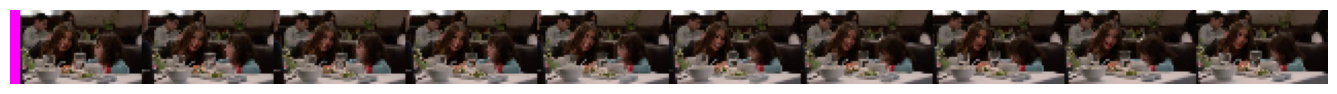

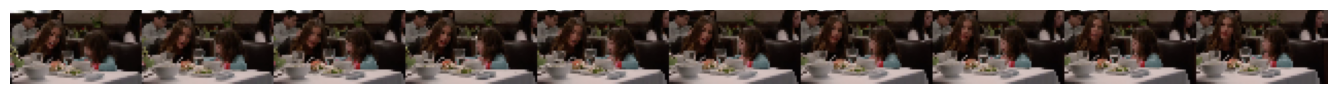

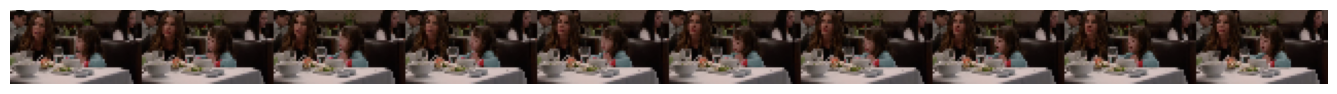

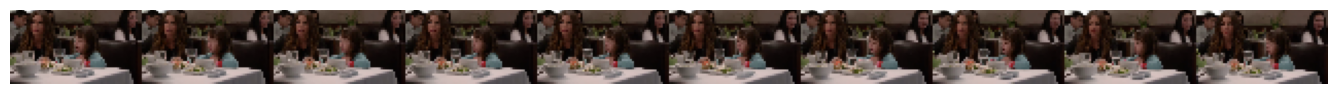


42.


ValueError: max() arg is an empty sequence

In [6]:
im_cp.caption_video('sample2.mp4')